In [27]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
%matplotlib inline

import sys

sys.path.append("..")

import GanUtils as utils
import GaussianMixtureUtils as GMutils

sys.path.append("../DiscriminativeNN")

import DiscGaussianMixture5Layers as disc

sys.path.append("../GenerativeNN")

import GenGaussianMixture5Layers as gen

manualSeed = random.randint(1, 10000) # fix seed
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  1315


# DC-GAN implementation for gaussian mixture

In [28]:
batchSize = 64
nz = 100
nc = 2 # Number of outputs
ndf = 100
ngf = 100
niter = 20
nElements = 10000
lr = 0.00002
beta1 = 0.5

In [33]:
netG = torch.nn.Sequential(
    torch.nn.Linear(nz, ngf),
    torch.nn.ReLU(),
    torch.nn.Linear(ngf, nc),
    torch.nn.Tanh()
)


netD = torch.nn.Sequential(
    torch.nn.Linear(nc, ndf),
    torch.nn.ReLU(),
    torch.nn.Linear(ndf, 1),
    torch.nn.Sigmoid()
)

In [34]:
criterion = nn.BCELoss()

# Might mistake here
input = torch.FloatTensor(batchSize, 2)
noise = torch.FloatTensor(batchSize, nz)
fixed_noise = torch.FloatTensor(batchSize, nz).normal_(0, 1)
label = torch.FloatTensor(batchSize)
real_label = 1
fake_label = 0

input = Variable(input)
label = Variable(label)
noise = Variable(noise)
fixed_noise = Variable(fixed_noise)

# setup optimizer
optimizerD = optim.Adam(netD.parameters(), lr = lr, betas = (beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr = lr, betas = (beta1, 0.999))

 Target distribution ... 


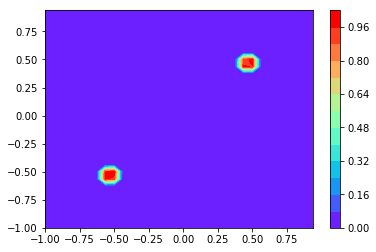

In [35]:
print(" Target distribution ... ")
GMutils.plot_heat_map(GMutils.sample(10000))

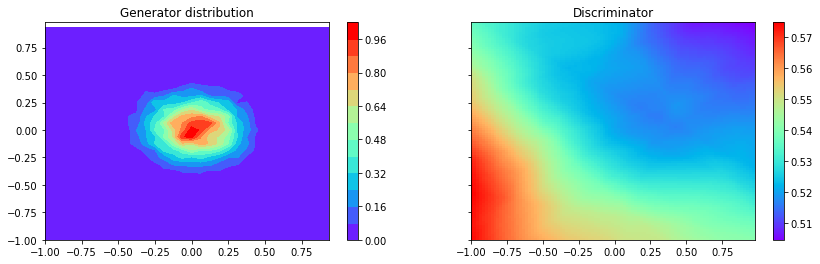

[1/21][0/10000] Loss_D: 1.3691 Loss_G: 0.6519 D(x): 0.5314 D(G(z)): 0.5211 / 0.5211


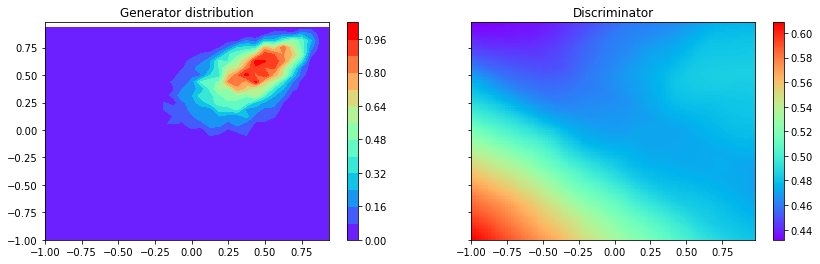

[1/21][2000/10000] Loss_D: 1.3254 Loss_G: 0.7343 D(x): 0.5108 D(G(z)): 0.4792 / 0.4799


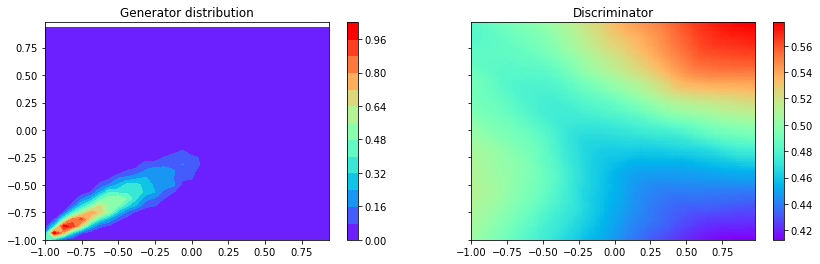

[1/21][4000/10000] Loss_D: 1.3466 Loss_G: 0.7115 D(x): 0.5146 D(G(z)): 0.4937 / 0.4910


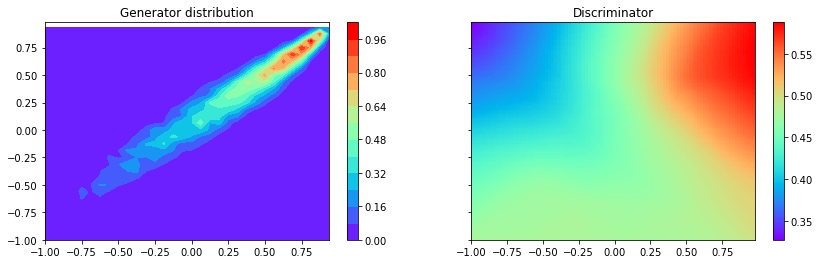

[1/21][6000/10000] Loss_D: 1.3855 Loss_G: 0.6699 D(x): 0.5219 D(G(z)): 0.5169 / 0.5141


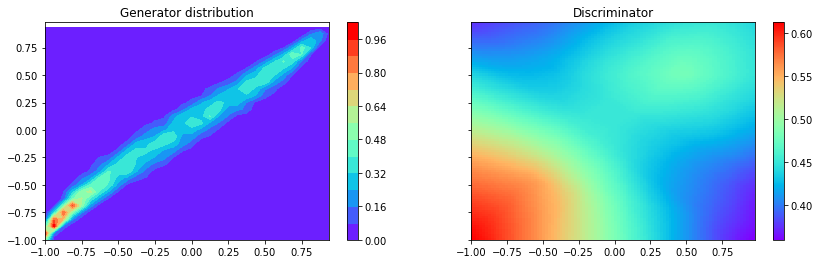

[1/21][8000/10000] Loss_D: 1.3518 Loss_G: 0.7215 D(x): 0.5190 D(G(z)): 0.4975 / 0.4877


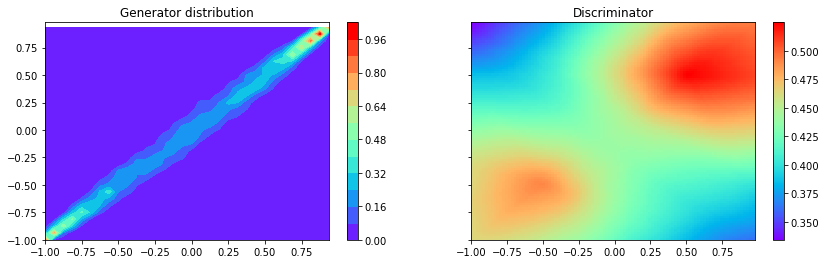

[2/21][0/10000] Loss_D: 1.3394 Loss_G: 0.7184 D(x): 0.5081 D(G(z)): 0.4835 / 0.4882


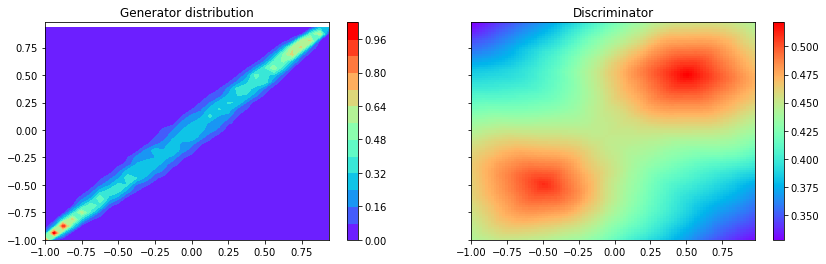

[2/21][2000/10000] Loss_D: 1.3179 Loss_G: 0.7344 D(x): 0.5147 D(G(z)): 0.4793 / 0.4803


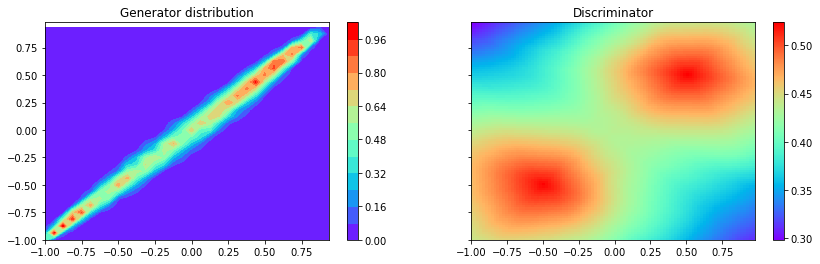

[2/21][4000/10000] Loss_D: 1.3010 Loss_G: 0.7503 D(x): 0.5217 D(G(z)): 0.4776 / 0.4729


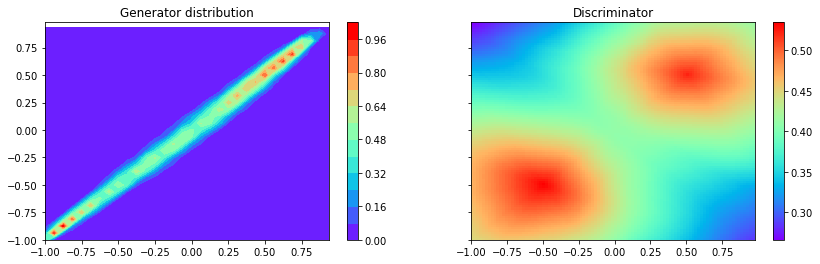

[2/21][6000/10000] Loss_D: 1.2769 Loss_G: 0.7612 D(x): 0.5259 D(G(z)): 0.4685 / 0.4680


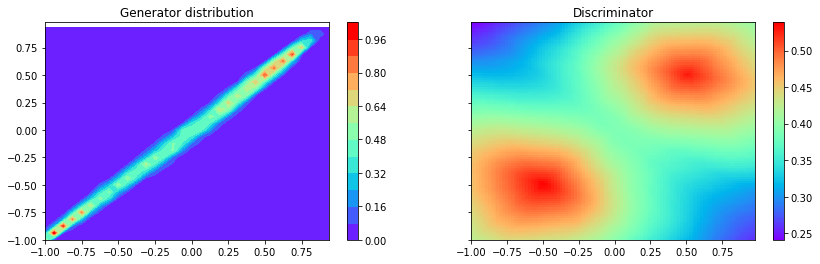

[2/21][8000/10000] Loss_D: 1.2732 Loss_G: 0.7625 D(x): 0.5315 D(G(z)): 0.4717 / 0.4685


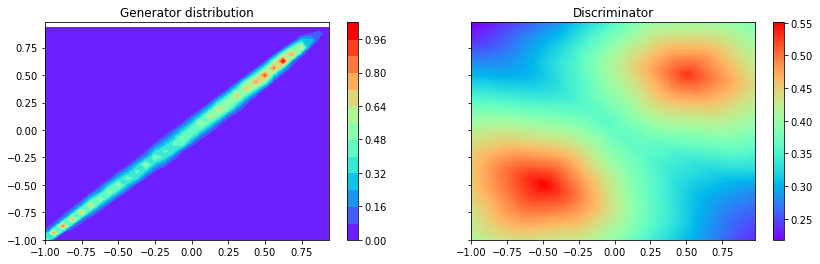

[3/21][0/10000] Loss_D: 1.2426 Loss_G: 0.7791 D(x): 0.5372 D(G(z)): 0.4603 / 0.4613


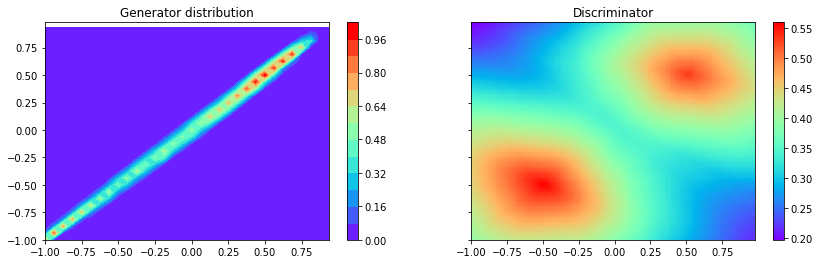

[3/21][2000/10000] Loss_D: 1.2198 Loss_G: 0.7985 D(x): 0.5431 D(G(z)): 0.4535 / 0.4537


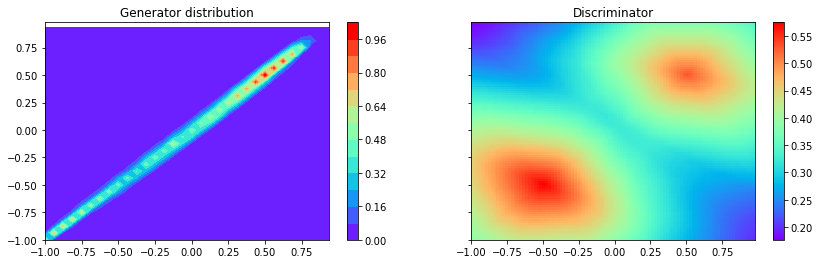

[3/21][4000/10000] Loss_D: 1.1978 Loss_G: 0.8135 D(x): 0.5453 D(G(z)): 0.4430 / 0.4477


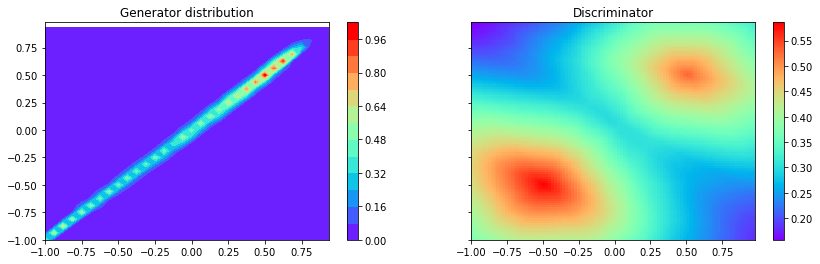

[3/21][6000/10000] Loss_D: 1.1557 Loss_G: 0.7941 D(x): 0.5549 D(G(z)): 0.4269 / 0.4573


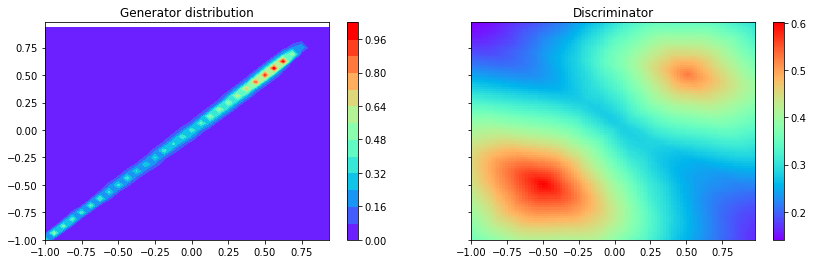

[3/21][8000/10000] Loss_D: 1.1941 Loss_G: 0.8164 D(x): 0.5503 D(G(z)): 0.4411 / 0.4488


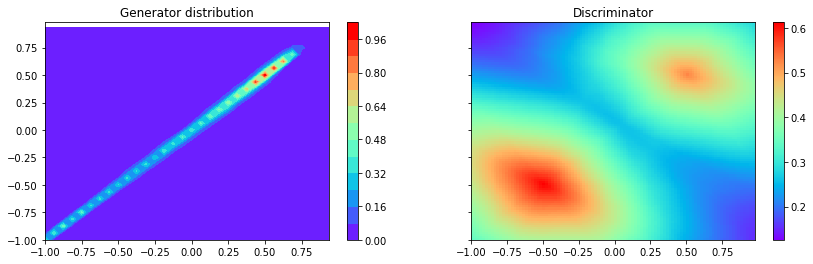

[4/21][0/10000] Loss_D: 1.1495 Loss_G: 0.8581 D(x): 0.5613 D(G(z)): 0.4280 / 0.4325


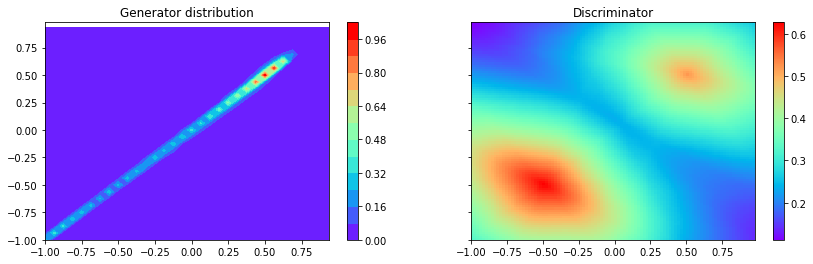

[4/21][2000/10000] Loss_D: 1.1618 Loss_G: 0.8492 D(x): 0.5682 D(G(z)): 0.4408 / 0.4394


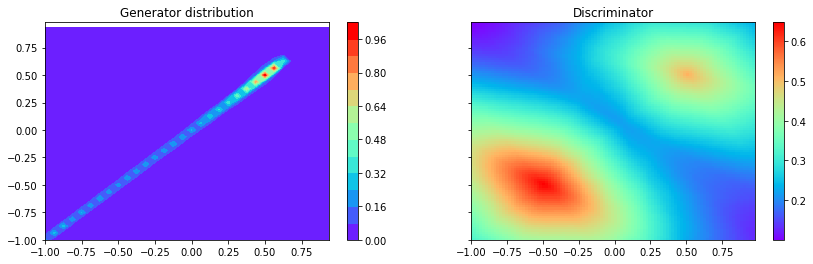

[4/21][4000/10000] Loss_D: 1.1093 Loss_G: 0.8510 D(x): 0.5673 D(G(z)): 0.4053 / 0.4398


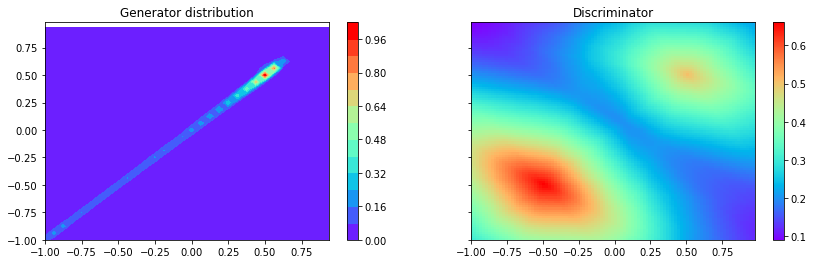

[4/21][6000/10000] Loss_D: 1.1217 Loss_G: 0.9297 D(x): 0.5678 D(G(z)): 0.4109 / 0.4105


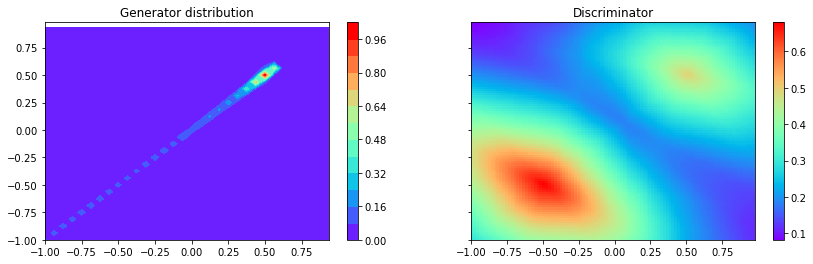

[4/21][8000/10000] Loss_D: 1.1837 Loss_G: 0.8772 D(x): 0.5793 D(G(z)): 0.4529 / 0.4325


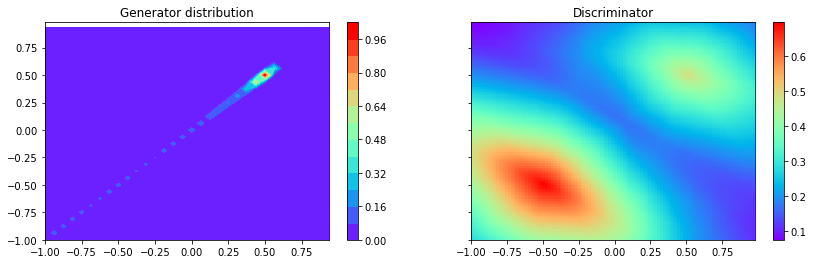

[5/21][0/10000] Loss_D: 1.1198 Loss_G: 0.8581 D(x): 0.5782 D(G(z)): 0.4169 / 0.4327


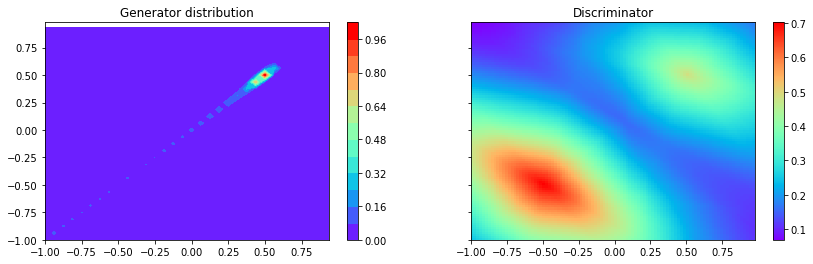

[5/21][2000/10000] Loss_D: 1.0682 Loss_G: 0.9025 D(x): 0.6052 D(G(z)): 0.4110 / 0.4240


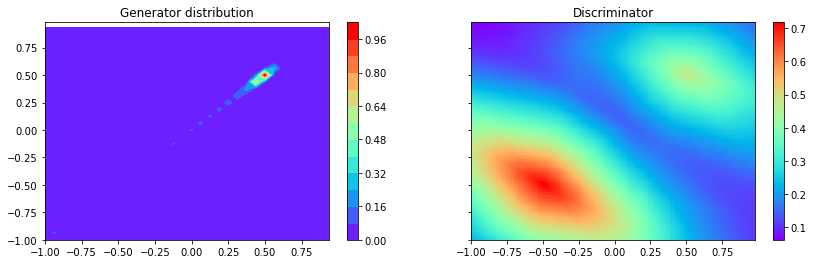

[5/21][4000/10000] Loss_D: 1.1112 Loss_G: 1.0171 D(x): 0.5877 D(G(z)): 0.4142 / 0.3856


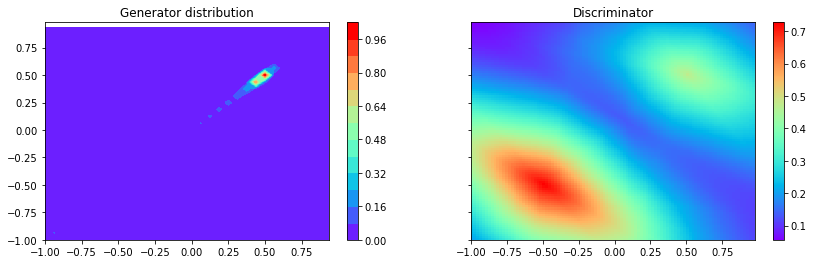

[5/21][6000/10000] Loss_D: 1.0806 Loss_G: 1.0498 D(x): 0.6030 D(G(z)): 0.4155 / 0.3730


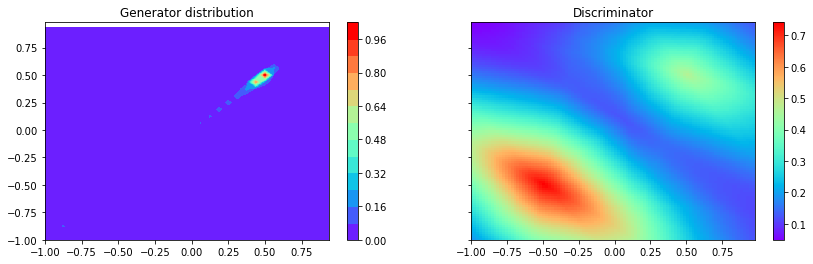

[5/21][8000/10000] Loss_D: 1.1058 Loss_G: 0.9861 D(x): 0.5897 D(G(z)): 0.4095 / 0.3936


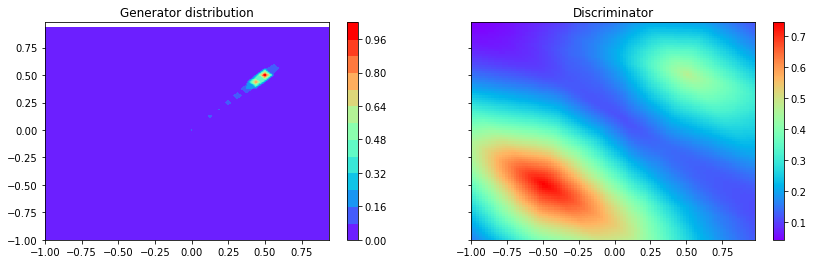

[6/21][0/10000] Loss_D: 1.0220 Loss_G: 0.9506 D(x): 0.6310 D(G(z)): 0.4018 / 0.4205


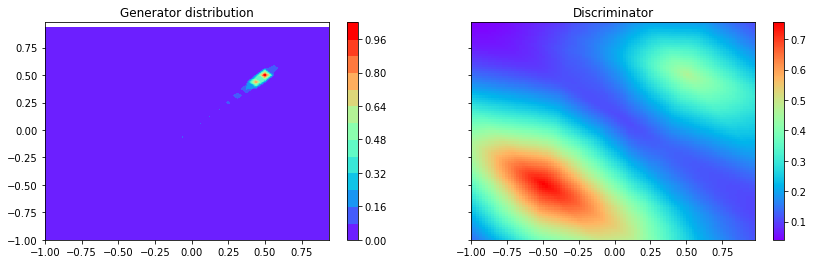

[6/21][2000/10000] Loss_D: 1.1343 Loss_G: 0.9636 D(x): 0.5798 D(G(z)): 0.4076 / 0.4139


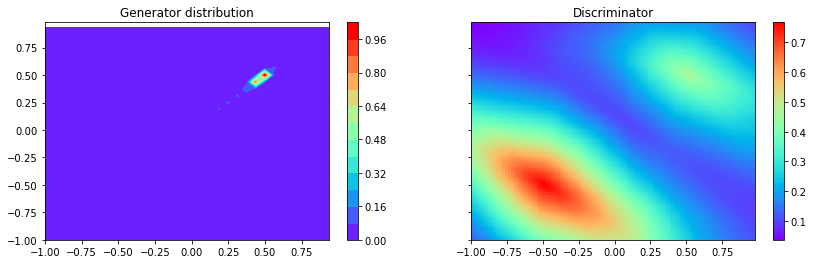

[6/21][4000/10000] Loss_D: 1.0917 Loss_G: 1.0343 D(x): 0.6214 D(G(z)): 0.4197 / 0.3869


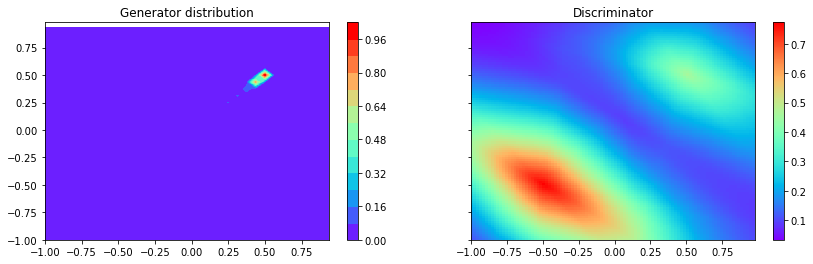

[6/21][6000/10000] Loss_D: 1.1082 Loss_G: 1.1341 D(x): 0.5995 D(G(z)): 0.4161 / 0.3588


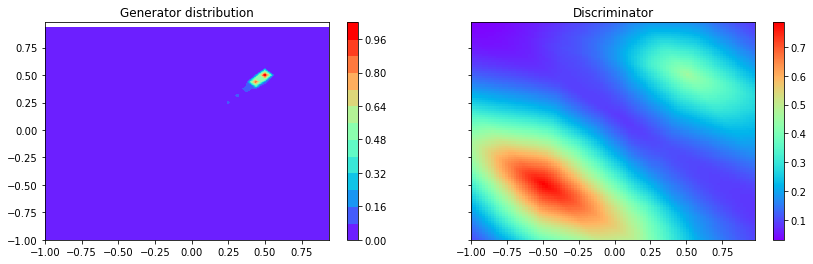

[6/21][8000/10000] Loss_D: 1.0190 Loss_G: 1.0695 D(x): 0.6190 D(G(z)): 0.3702 / 0.3833


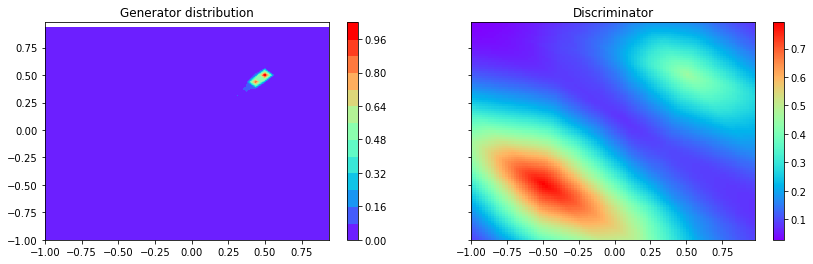

[7/21][0/10000] Loss_D: 1.0183 Loss_G: 1.0379 D(x): 0.6315 D(G(z)): 0.3885 / 0.3884


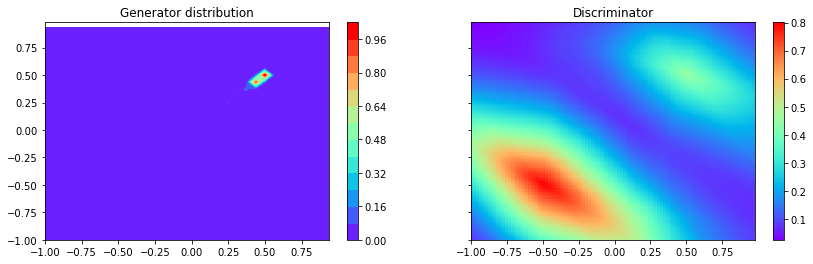

[7/21][2000/10000] Loss_D: 1.0830 Loss_G: 1.0005 D(x): 0.6072 D(G(z)): 0.4041 / 0.4000


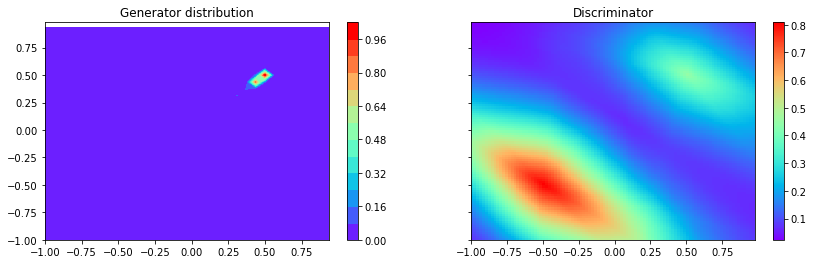

[7/21][4000/10000] Loss_D: 1.0254 Loss_G: 1.1521 D(x): 0.6424 D(G(z)): 0.3991 / 0.3646


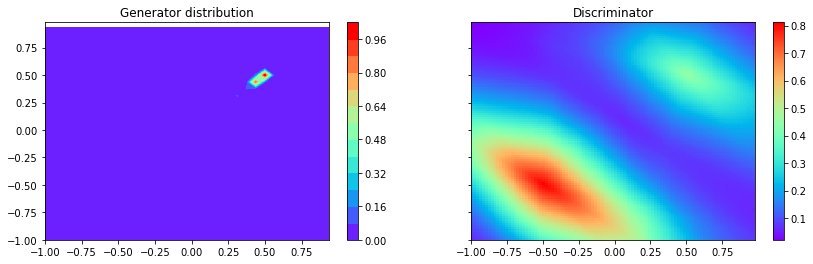

[7/21][6000/10000] Loss_D: 1.0241 Loss_G: 0.9359 D(x): 0.6411 D(G(z)): 0.3967 / 0.4066


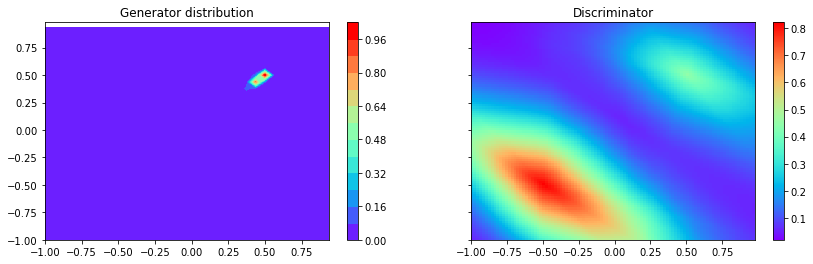

[7/21][8000/10000] Loss_D: 1.0799 Loss_G: 1.2155 D(x): 0.6214 D(G(z)): 0.4057 / 0.3492


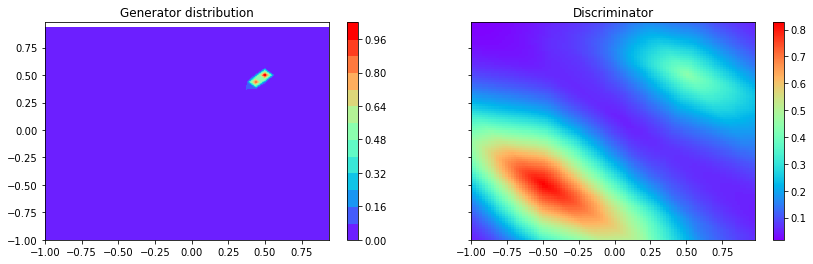

[8/21][0/10000] Loss_D: 0.9906 Loss_G: 1.2019 D(x): 0.6256 D(G(z)): 0.3546 / 0.3454


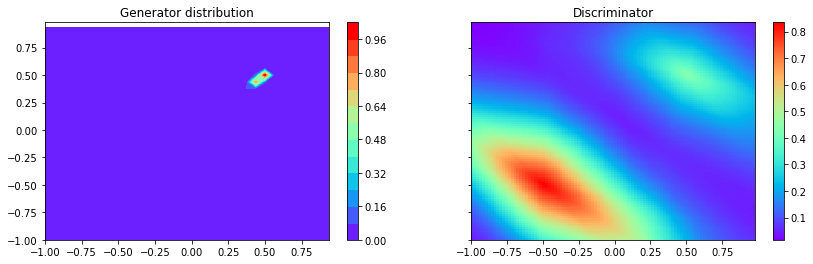

[8/21][2000/10000] Loss_D: 0.9730 Loss_G: 1.0724 D(x): 0.6408 D(G(z)): 0.3584 / 0.3706


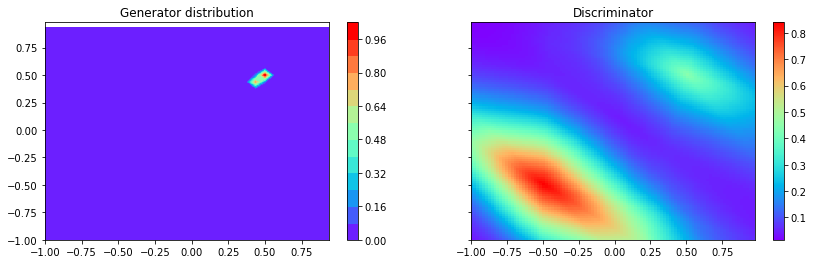

[8/21][4000/10000] Loss_D: 1.0673 Loss_G: 1.1602 D(x): 0.6003 D(G(z)): 0.3736 / 0.3599


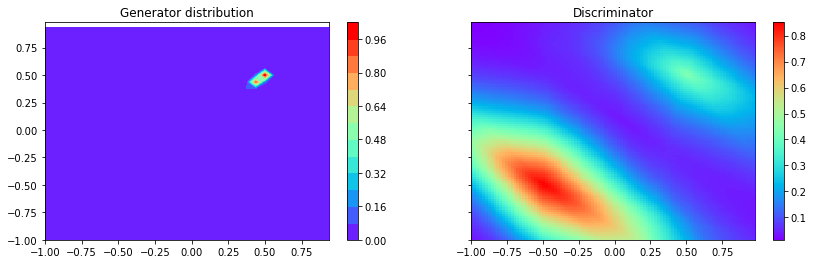

[8/21][6000/10000] Loss_D: 1.0035 Loss_G: 1.2430 D(x): 0.6203 D(G(z)): 0.3624 / 0.3401


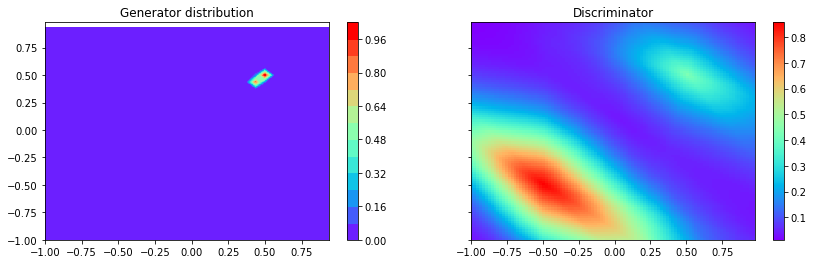

[8/21][8000/10000] Loss_D: 1.0371 Loss_G: 1.0959 D(x): 0.6348 D(G(z)): 0.3806 / 0.3883


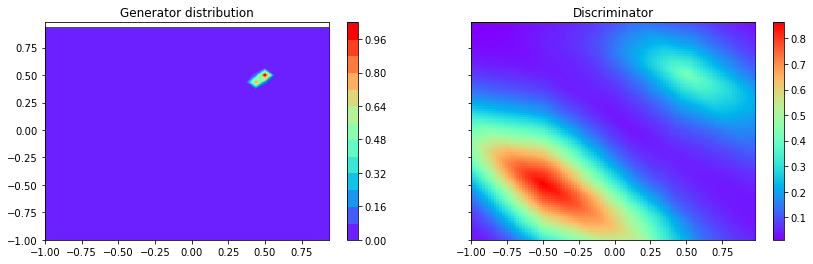

[9/21][0/10000] Loss_D: 1.0406 Loss_G: 1.1866 D(x): 0.6790 D(G(z)): 0.4157 / 0.3480


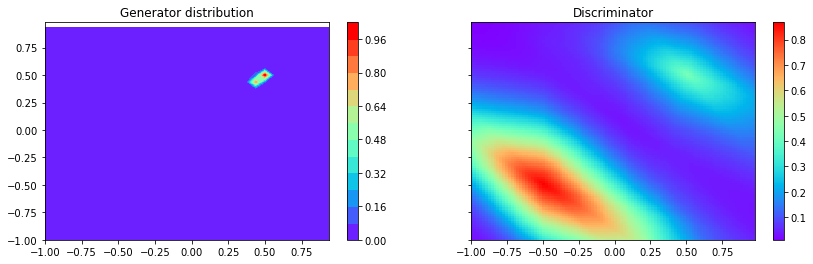

[9/21][2000/10000] Loss_D: 1.0121 Loss_G: 1.1437 D(x): 0.6106 D(G(z)): 0.3514 / 0.3539


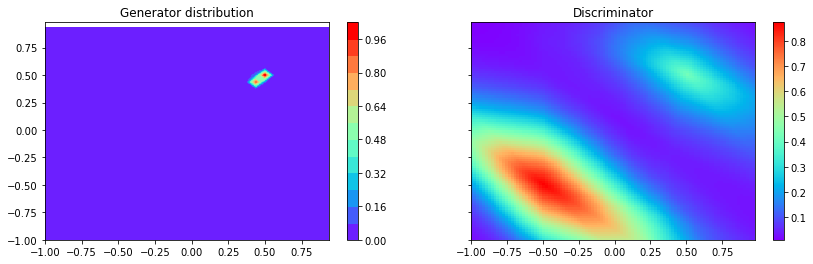

[9/21][4000/10000] Loss_D: 1.0064 Loss_G: 1.0741 D(x): 0.6245 D(G(z)): 0.3518 / 0.3804


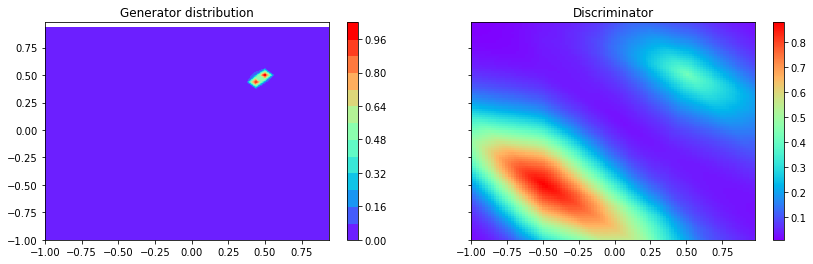

[9/21][6000/10000] Loss_D: 0.9149 Loss_G: 1.2863 D(x): 0.6851 D(G(z)): 0.3592 / 0.3316


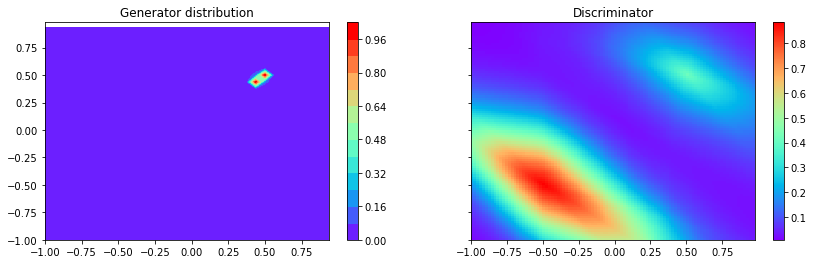

[9/21][8000/10000] Loss_D: 1.0203 Loss_G: 1.0699 D(x): 0.6171 D(G(z)): 0.3571 / 0.3919


KeyboardInterrupt: 

In [36]:
print_every = nElements / 5

for epoch in range(1, niter + 1):
    for i in range(nElements):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu = GMutils.sample(batchSize)
        batch_size = real_cpu.size(0)
        input.data.resize_(real_cpu.size()).copy_(real_cpu)
        label.data.resize_(batch_size).fill_(real_label)

        output = netD(input)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.data.mean()

        # train with fake
        # Change Here also
        noise.data.resize_(batch_size, nz)
        noise.data.normal_(0, 1)
        fake = netG(noise).detach()
        label.data.fill_(fake_label)
        output = netD(fake)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.data.fill_(real_label) # fake labels are real for generator cost
        noise.data.normal_(0, 1)
        fake = netG(noise)
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.data.mean()
        optimizerG.step()
        
        if i % print_every == 0:
            GMutils.plot_duo_heat_map(utils.sample_G(netG, nz, 10000), netD)
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, niter + 1, i, nElements,
                 errD.data[0], errG.data[0], D_x, D_G_z1, D_G_z2))